# Introduction
This is my first notebook with TensorFlow model. I decided to learn this library, so the Iris Classification was a perfect 'hello world'. I used a Deep Neural Network Classifier which is a type of machine learning that mimics the way the brain learns.

Here is the documentation: https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier

# Setup

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
flowers = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')

# EDA

In [3]:
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
flowers.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
flowers['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

[]

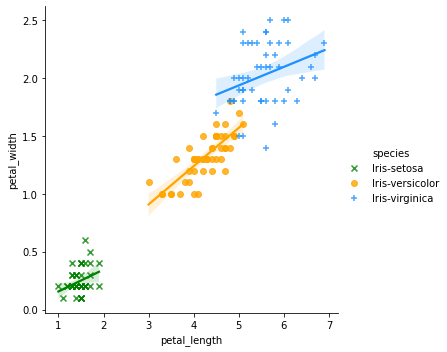

In [7]:
sns.lmplot(data = flowers, x = 'petal_length', y = 'petal_width', hue = 'species', 
           markers = ['x', 'o', '+'], palette = ['green', 'orange', 'dodgerblue'])
plt.plot()

[]

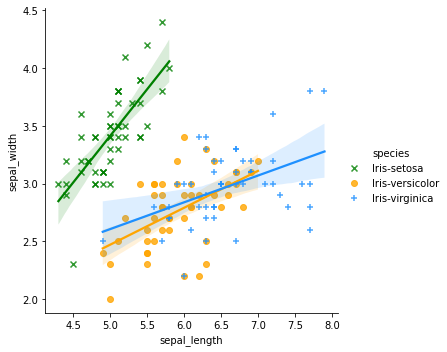

In [8]:
sns.lmplot(data = flowers, x = 'sepal_length', y = 'sepal_width', hue = 'species', 
           markers = ['x', 'o', '+'], palette = ['green', 'orange', 'dodgerblue'])
plt.plot()

# Model

## Cleaning

In [9]:
flowers['species'] = flowers['species'].apply(lambda x: 0 if x=='Iris-setosa' else 1 if x=='Iris-versicolor' else 2)

In [10]:
X = flowers.drop(columns=['species'])
y = flowers['species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(120, 4)

## Input function

In [13]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

## Feature columns

In [14]:
my_feature_columns = []
for key in X_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


## Model

In [15]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

2022-10-29 13:54:05.846657: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Training

In [16]:
classifier.train(
    input_fn=lambda: input_fn(X_train, y_train, training=True),
    steps=5000)

2022-10-29 13:54:06.648375: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Evaluation

In [17]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(X_test, y_test, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.767



## Predictions

In [18]:
expected = [0, 1, 2]
predict_x = {
    'sepal_length': [5.1, 5.9, 6.9],
    'sepal_width': [3.3, 3.0, 3.1],
    'petal_length': [1.7, 4.2, 5.4],
    'petal_width': [0.5, 1.5, 2.1],
}
species = ['Setosa', 'Versicolor', 'Virginica']

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
predict = {}

def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predictions = classifier.predict(input_fn=lambda: input_fn(predict_x))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    print('Prediction is "{}" ({:.1f}%)'.format(
        species[class_id], 100 * probability))

Prediction is "Setosa" (66.6%)
Prediction is "Setosa" (34.0%)
Prediction is "Virginica" (45.5%)
